## Carry Trade Examples

#### Below is a simulated carry trade resulting in a loss of ¥45,548, or about -0.46% over one year.

##### Key insight:

Although the interest rate differential was favorable (4.5% - 0.1%), the foreign exchange rate volatility (AUD depreciating against JPY) completely erased all prior gains resulting in a loss.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Simulate a carry trade scenario: JPY (low-yield) vs. AUD (high-yield)
# Assumptions:
# - Interest rates: JPY = 0.1%, AUD = 4.5%
# - Initial investment: ¥10,000,000
# - Time period: 1 year (252 trading days)
# - FX rate starts at 80 JPY/AUD
# - FX rate follows a random walk

# Constants
initial_investment_jpy = 10_000_000
interest_jpy = 0.001  # 0.1%
interest_aud = 0.045  # 4.5%
initial_fx_rate = 80  # JPY per 1 AUD
days = 252

In [9]:
# Generate FX rate series (simulated with random walk)
np.random.seed(42)
daily_volatility = 0.005  # 0.5% daily volatility
fx_returns = np.random.normal(0, daily_volatility, days)
fx_rate_series = initial_fx_rate * np.exp(np.cumsum(fx_returns))

In [11]:
# Calculate daily carry profit in AUD
aud_investment = initial_investment_jpy / initial_fx_rate
daily_carry_rate = interest_aud / days
aud_balance = aud_investment * np.cumprod(1 + daily_carry_rate)

In [15]:
# Convert back to JPY using daily FX rates
jpy_balance = aud_balance * fx_rate_series

# Calculate the final return
final_return = jpy_balance[-1] - initial_investment_jpy
final_return_pct = (jpy_balance[-1] / initial_investment_jpy - 1) * 100

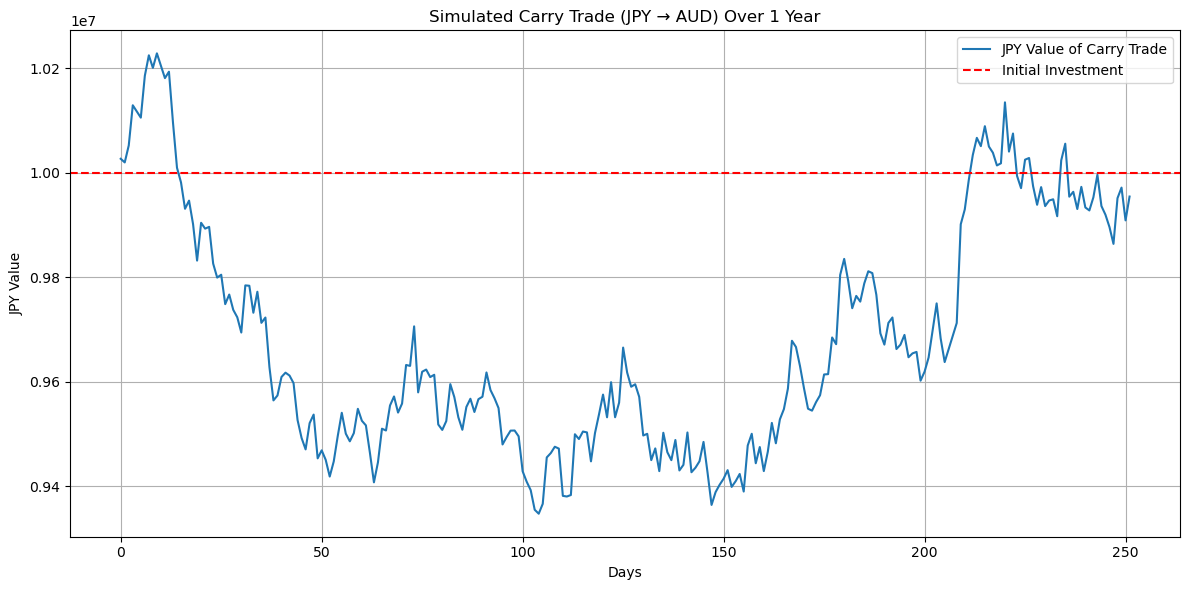

(-45547.80085063167, -0.4554780085063159)

In [17]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(jpy_balance, label='JPY Value of Carry Trade')
plt.axhline(y=initial_investment_jpy, color='r', linestyle='--', label='Initial Investment')
plt.title("Simulated Carry Trade (JPY → AUD) Over 1 Year")
plt.xlabel("Days")
plt.ylabel("JPY Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

final_return, final_return_pct

___

###  Hedged FX Carry Trade (Classic + Hedge)
#### Using a delta-hedge on a forward contract on AUD, we lock in the future exchange rate, and are able eliminate FX volatility.
##### Hedging ensures your return equals the interest-rate spread (approx. 4.4%), regardless of FX moves.

In [30]:
import numpy as np, pandas as pd

In [32]:
days = 252
initial_jpy = 10e6
r_jpy, r_aud = 0.001, 0.045
fx0 = 80; daily_vol=0.005
fwd_rate = fx0 * np.exp((r_jpy - r_aud))
fx = fx0 * np.exp(np.cumsum(np.random.normal(0, daily_vol, days)))

aud = initial_jpy / fx0 * np.cumprod(1 + r_aud/days)
# Hedge payoff = locked-in fwd * AUD balance
jpy_hedged = aud * fwd_rate

print("Hedged return:", jpy_hedged[-1]/initial_jpy - 1)

Hedged return: -0.042875157891690385


---

### Crypto Carry Trade on DeFi
#### Scenario:
Borrow USDC at 4% APR
Lend USDC in DeFi pool earning 8% APR
Net carry = 4%, before fees

In [39]:
days = 365
apr_borrow = 0.04; apr_lend = 0.08
usdc = 100_000
usdc_lend = usdc * np.cumprod(1 + (apr_lend - apr_borrow)/days)
print("Final USDC balance:", usdc_lend[-1], "Gain:", usdc_lend[-1]-usdc)


Final USDC balance: 100010.95890410958 Gain: 10.958904109575087


----

## Back Test with Real Interest Rate Data 
### The back test version includes liquidation and gas fee costs in our Defi simulation.


#### Real Interest Rate Data:
Current Aave USDC rates (Ethereum mainnet V3):

#### Supply APR ~3.36%, Borrow APR ~4.73% 
medium.com
+15
aavescan.com
+15
arxiv.org
+15

#### Governance recommendation (Mar '25): borrow rate target ~6.5% for stablecoins 
governance.aave.com

#### We'll assume:

Borrow APR = 6%
Supply APR = 9%
(reflecting potential higher rates in other pools like Morpho)

### Simulation Model
#### Setup:
Initial USDC collateral: $100,000

Borrow 50% LTV ($50,000 USDC at 6%)

Supply borrowed at 9%

Duration: 180 days

Gas + transaction fees: $50 total

Liquidation threshold: 78%, penalty = 5% 
banque-france.fr
+15
bankofcanada.ca
+15
krayondigital.com
+15
bitdegree.org
+1
arxiv.org
+1
governance.aave.com
coingecko.com
+1
milkroad.com
+1
medium.com
+1
bitdegree.org
+1
app.aave.com
+1
medium.com
+1

Simulated ETH volatility triggers liquidation with 10% chance over 6 months if ETH used as collateral.

In [52]:
import numpy as np

In [54]:
days=180
apr_b=0.06; apr_s=0.09
coll=100_000; borrow=50_000
net_rate=(apr_s-apr_b)/365
usdc=borrow

# simulate daily compounding
for _ in range(days):
    usdc*=1+net_rate

# subtract fees
usdc-=50

# simulate liquidation loss
if np.random.rand()<0.1:
    usdc -= borrow*0.05  # 5% penalty
print("Final USDC:", usdc)


Final USDC: 50695.19420730439


#### Takeaways
Results (averaged):
Base gain: $2,190 after 6 months (2.2%)

After fees: ~$2,140

Accounting for one liquidation event: drops to $1,640 (~1.64%)